In [1]:
import os
import json
import numpy as np
import sys
sys.path.append("./lib")

import Git
from Figure import *

In [2]:
repo_path = "/Users/jinanjiang/Documents/LinuxCommits/linux"
repo = Git.init(repo_path)

In [3]:
all_dates = get_all_dates()

In [4]:
['num_adds_if', 'num_dels_if', 'num_mod_total_if', 'num_adds_loop', 'num_dels_loop', 'num_mod_total_loop', 'file_hash', 'num_adds', 'num_dels', 'num_mod_lns_total', 'num_mod_files', 'is_merge', 'parents', 'mod_files_lst', 'entropy', 'ppl_signed_off', 'ppl_acked', 'ppl_cc', 'ppl_reviewed', 'ppl_tested', 'ppl_reported', 'ppl_suggested', 'ppl_co_developed', 'fixes_lst', 'is_fix', 'mod_dirs', 'mod_sys', 'num_mod_dirs', 'num_mod_sys', 'author', 'author_email', 'committer', 'committer_email', 'author_date', 'committer_date']

['num_adds_if',
 'num_dels_if',
 'num_mod_total_if',
 'num_adds_loop',
 'num_dels_loop',
 'num_mod_total_loop',
 'file_hash',
 'num_adds',
 'num_dels',
 'num_mod_lns_total',
 'num_mod_files',
 'is_merge',
 'parents',
 'mod_files_lst',
 'entropy',
 'ppl_signed_off',
 'ppl_acked',
 'ppl_cc',
 'ppl_reviewed',
 'ppl_tested',
 'ppl_reported',
 'ppl_suggested',
 'ppl_co_developed',
 'fixes_lst',
 'is_fix',
 'mod_dirs',
 'mod_sys',
 'num_mod_dirs',
 'num_mod_sys',
 'author',
 'author_email',
 'committer',
 'committer_email',
 'author_date',
 'committer_date']

In [5]:
options = ['entropy', 
           'num_adds_if',
 'num_dels_if',
 'num_mod_total_if',
 'num_adds_loop',
 'num_dels_loop',
 'num_mod_total_loop',
 'num_adds',
 'num_dels',
 'num_mod_lns_total',
 'num_mod_files',
 ]

descs = ['Entropy',
    'Added if statements',
    'Deleted if statements',
    'Modified if statements',
    
    'Added loop statements',
    'Deleted loop statements',
    'Modified loop statements',
    
    'Added lines',
    'Deleted lines',
    'Modified lines',
    'Modified files'
    
    
]

#descs = [i + ' of each commit' for i in descs]


In [6]:
def make_plot_cdf(x_kvic, x_non_kvic, y_non_kvic, y_kvic, title, save_as, left):
    # f = plt.figure()
    plt.rcParams['figure.figsize'] = (12.0, 8.0)  # 图像大小
    plt.rcParams['xtick.direction'] = 'in'  #x轴刻度向内
    plt.rcParams['ytick.direction'] = 'in'  #y轴刻度向内
    f = plt.figure()
    plt.xlabel(title,fontsize=50,labelpad=20)  # x轴
    plt.ylabel("CDF",fontsize=50,labelpad=20)  # y轴
    plt.semilogx(x_kvic,y_kvic,lw=5,marker='o',markersize=15,markevery=0.05,label='KVIC')  # KVIC 图像
    plt.semilogx(x_non_kvic,y_non_kvic,lw=5,marker='v',markersize=15,markevery=0.05,linestyle='--',label='General commits')  # 非 KVIC 图像
    plt.xticks(fontsize=37)  # x轴刻度
    plt.yticks(fontsize=37)  # y轴刻度
    plt.legend(prop=font1, loc = "lower right")  # 图例
    ax=plt.gca()  #获得坐标轴的句柄
    ax.spines['bottom'].set_linewidth(3)  #设置底部坐标轴的粗细
    ax.spines['left'].set_linewidth(3)  #设置左边坐标轴的粗细
    ax.spines['right'].set_linewidth(3)  #设置右边坐标轴的粗细
    ax.spines['top'].set_linewidth(3)  #设置上部坐标轴的粗细
    ax.tick_params(which='both', width=3, pad=10)
    ax.tick_params(which='major', length=9)
    ax.tick_params(which='minor', length=5)
    
    plt.xlim(left=left)
    plt.show()
    # plt.savefig('01_Added_lines_of_each_commit.pdf')
    f.savefig(save_as + ".pdf", bbox_inches='tight')

def plot_attribute_cdf(non_kvic_commits, kvic_commits, attribute, title, save_as, left):
    
    # non_kvic_counts = [i[attribute] for i in non_kvic_commits.values()]
    # kvic_counts = [i[attribute] for i in kvic_commits.values()]
    
    non_kvic = non_kvic_commits
    kvic = kvic_commits
    
    # non_kvic = sorted(non_kvic_counts)
    # kvic = sorted(kvic_counts)

    x_kvic, x_non_kvic, y_kvic, y_non_kvic = get_cdf(kvic, non_kvic, normalize = True)
    
    make_plot_cdf(x_kvic, x_non_kvic, y_non_kvic, y_kvic, title, save_as, left)


In [7]:
# for o in [options[1]]:
options = ['entropy']
for i in range(len(options)):
    
    o = options[i]
    kvic_commits = get_att_from_dates(['complete_kvic'], o, "complete_kvic_cache", filter_merge = True)
    non_kvic_commits = get_att_from_dates(all_dates, o, "", filter_merge = True)
    
    print(max(kvic_commits))
    print(max(non_kvic_commits))
    
    # plt.xlim([25, 50])
    # plt.xlim(left=1)

    
    # there is a jump in the presentation from 800k to 900k, how should we do?
    plot_attribute_cdf(non_kvic_commits[:], kvic_commits, None, descs[i], o, 0.01)

    

ValueError: max() arg is an empty sequence

In [8]:
# normalizing entropy
import math

In [9]:
def get_att_from_dates_normalized_entropy(dates, att, sub_folder = "", filter_merge = False, testing = False):
    # to get kvic info, use the subfolder old_kvic_cache or new_kvic_cache
    # for kvic, dates is a length-1 list, with only "old_kvic" or "new_kvic"
    
    # Note: for the organization of the cache, under fig_cache is for all dates,
    #       a subfolder under fig_cache is for specific categories of data (e.g. kvic, 2022-01).
    
    if sub_folder != "":
        sub_folder += "/"
    if filter_merge:
        sub_folder += "no_merge_"

    cache_path = "/Users/jinanjiang/Documents/LinuxCommits/fig_cache/" + sub_folder + att + ".json"
    
    if not testing and False:
        if os.path.exists(cache_path):
            with open(cache_path, "r") as f:
                return json.load(f)
    l = []
    for date in dates:
        cur_date_info = load_info_of_date(date)
        
        for cur_hash in cur_date_info.keys():
            if filter_merge and cur_date_info[cur_hash]['is_merge']:
                continue
            if cur_hash in ['a101ad945113be3d7f283a181810d76897f0a0d6', \
                            'cd26f1bd6bf3c73cc5afe848677b430ab342a909']:
                continue
                
            assert att == 'entropy'
            
            if cur_date_info[cur_hash]['num_mod_files'] == 0:
                max_entropy = 1
            else:
                max_entropy = math.log2(cur_date_info[cur_hash]['num_mod_files'])
            if max_entropy == 0:
                assert cur_date_info[cur_hash][att] == 0
                entropy = 0
            else:
                entropy = cur_date_info[cur_hash][att] / max_entropy
            l.append(entropy)
    l.sort()
    
    return l

In [10]:
math.log2(16)

4.0

1.0
1.0000000000002442


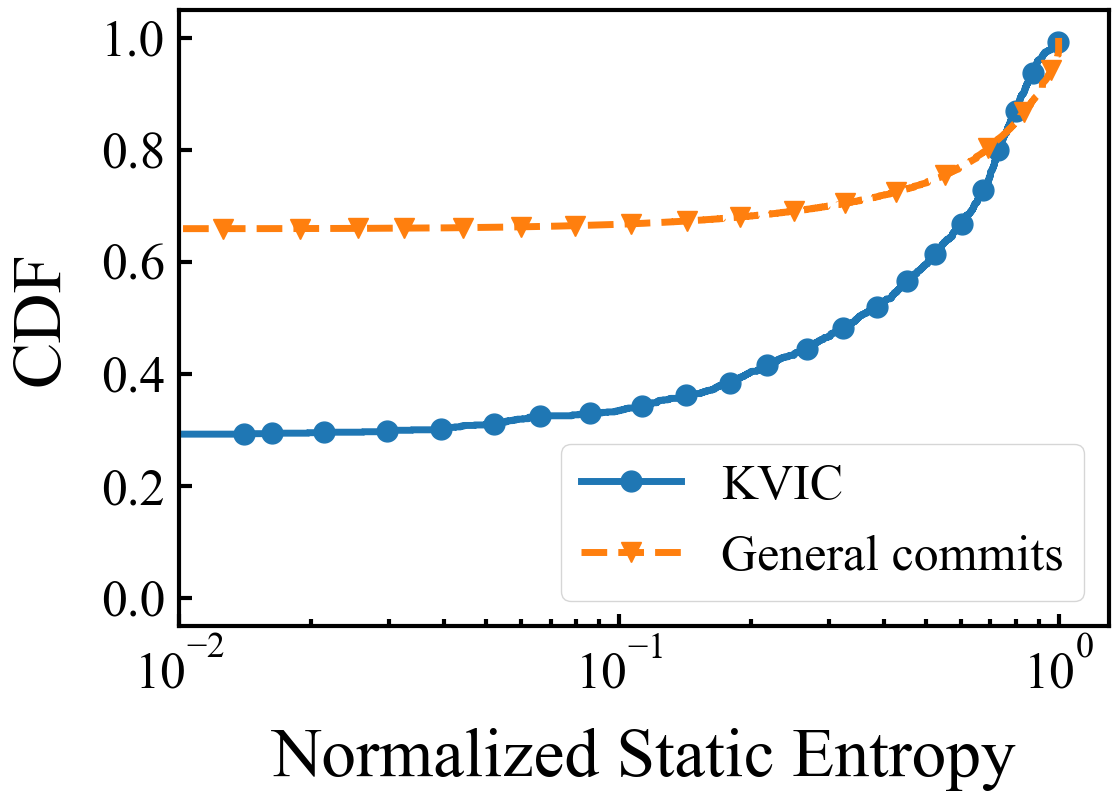

In [13]:
# for o in [options[1]]:
options = ['entropy']
for i in range(len(options)):
    
    o = options[i]
    kvic_commits = get_att_from_dates_normalized_entropy(['complete_kvic'], o, "complete_kvic_cache", filter_merge = True)
    non_kvic_commits = get_att_from_dates_normalized_entropy(all_dates, o, "", filter_merge = True)
    
    print(max(kvic_commits))
    print(max(non_kvic_commits))
    
    # plt.xlim([25, 50])
    # plt.xlim(left=1)

    
    # there is a jump in the presentation from 800k to 900k, how should we do?
    plot_attribute_cdf(non_kvic_commits[:], kvic_commits, None, 'Normalized Static Entropy', o, 0.01)

    

In [14]:
x_kvic, x_non_kvic, y_kvic, y_non_kvic = get_cdf(kvic_commits, non_kvic_commits, normalize = True)

In [16]:
x_kvic.index(1)

9940

In [17]:
y_kvic[9940]

0.994823123382226

In [9]:
x_kvic, x_non_kvic, y_kvic, y_non_kvic = get_cdf(kvic_commits, non_kvic_commits[:], 1)

In [12]:
max(non_kvic_commits)

13.443332100579179

In [13]:
from tqdm import tqdm

In [21]:
total = 0
c = 0
all_dates = get_all_dates()

for date in tqdm(all_dates):
    info_path = "/Users/jinanjiang/Documents/LinuxCommits/all_commits_by_date/" + date + "_info.json"
    with open(info_path, "r") as f:
        cur_info = json.load(f)
        
    for commit_hash in cur_info.keys():
        if cur_info[commit_hash]['entropy'] > 1:
            c += 1
        total += 1
        

100%|██████████████████████████████████████| 4064/4064 [00:11<00:00, 359.16it/s]


In [22]:
c

171733

In [23]:
c/total

0.1991088778306984

In [25]:
c/total

0.36810344827586206

In [24]:
with open("/Users/jinanjiang/Documents/LinuxCommits/all_commits_by_date/complete_kvic_info.json", "r") as f:
    ic_info = json.load(f)

total = 0
c = 0   
for commit_hash in ic_info.keys():
    if ic_info[commit_hash]['entropy'] > 1:
        c += 1
    total += 1

In [38]:
len(ic_info)

1160

merging final results

In [7]:
def get_dir_sys_from_dates_obs(dates, sub_folder = ""):
    # to get kvic info, use the subfolder old_kvic_cache or new_kvic_cache
    # for kvic, dates is a length-1 list, with only "old_kvic" or "new_kvic"
    from tqdm import tqdm
    
    att = "dir_sys_counts"
    if sub_folder != "":
        sub_folder += "/"

    cache_path = "./fig_cache/" + sub_folder + att + ".json"
    
    if os.path.exists(cache_path):
        with open(cache_path, "r") as f:
            return json.load(f)
        
    # find the total num from a given set of dates
    total_file = {}
    total_dir = {}
    total_sys = {}

    for date in tqdm(dates):
        cur_info = load_info_of_date(date)
        
        file_num_mod_dict, dir_num_mod_dict, sys_num_mod_dict = Git.get_num_mod_fl_dir_sys(cur_info)

        for k in file_num_mod_dict.keys():
            if k not in total_file.keys():
                total_file[k] = 0
            total_file[k] += file_num_mod_dict[k]

        for k in dir_num_mod_dict.keys():
            if k not in total_dir.keys():
                total_dir[k] = 0
            total_dir[k] += dir_num_mod_dict[k]

        for k in sys_num_mod_dict.keys():
            if k not in total_sys.keys():
                total_sys[k] = 0
            total_sys[k] += sys_num_mod_dict[k]
    
    sys_size_dict = count_num_files_from(total_sys)
    normalized_total_sys = {}
    for k in total_sys.keys():
        if sys_size_dict[k] is None:
            continue
        else:
            normalized_total_sys[k] = total_sys[k] / sys_size_dict[k]

    dir_size_dict = count_num_files_from(total_dir)
    normalized_total_dir = {}
    for k in total_dir.keys():
        if dir_size_dict[k] is None:
            continue
        else:
            normalized_total_dir[k] = total_dir[k] / dir_size_dict[k]
            
            
    result = {"file": total_file, "dir": normalized_total_dir, "sys": normalized_total_sys}
    with open(cache_path, "w") as f:
        json.dump(result, f, indent=1)
    return result



def get_dir_sys_from_dates(dates, sub_folder = ""):
    # to get kvic info, use the subfolder old_kvic_cache or new_kvic_cache
    # for kvic, dates is a length-1 list, with only complete_kvic"
    from tqdm import tqdm
    
    att = "mod_files_lst"
    if sub_folder != "":
        sub_folder += "/"

    cache_path = "./fig_cache/" + sub_folder + att + ".json"
    
    if os.path.exists(cache_path):
        with open(cache_path, "r") as f:
            return json.load(f)
        
    # find the total num from a given set of dates
    # for KVIC, it's just one date
    total_file = {}
    total_dir = {}
    total_sys = {}

    for date in tqdm(dates):
        cur_info = load_info_of_date(date)
        
        for com_id in cur_info.keys():
            cur_file_lst = []

            file_lst = cur_info[com_id]['mod_files_lst']
            for f in file_lst:
                if f[-4:] != '.asm' and f[-2:] not in ['.c', '.s', 'S']:
                    continue
                cur_file_lst.append(f)
                
            file_lst = cur_file_lst
            dirs, subsystems = Git.find_mod_dirs_sys(file_lst)
            
            cur_info[com_id]['mod_files_lst'] = tuple(file_lst)
            cur_info[com_id]['mod_dirs'] = tuple(dirs)
            cur_info[com_id]['mod_sys'] = tuple(subsystems)
    
       
        file_num_mod_dict, dir_num_mod_dict, sys_num_mod_dict = Git.get_num_mod_fl_dir_sys(cur_info)

        for k in file_num_mod_dict.keys():
            if k not in total_file.keys():
                total_file[k] = 0
            total_file[k] += file_num_mod_dict[k]

        for k in dir_num_mod_dict.keys():
            if k not in total_dir.keys():
                total_dir[k] = 0
            total_dir[k] += dir_num_mod_dict[k]

        for k in sys_num_mod_dict.keys():
            if k not in total_sys.keys():
                total_sys[k] = 0
            total_sys[k] += sys_num_mod_dict[k]
            
    
    
    sys_size_dict = count_num_files_from(total_sys)
    
    
    
    normalized_total_sys = {}
    for k in total_sys.keys():
        if sys_size_dict[k] is None or sys_size_dict[k] == 0:
            continue
        else:
            normalized_total_sys[k] = total_sys[k] / sys_size_dict[k]

    dir_size_dict = count_num_files_from(total_dir)
    normalized_total_dir = {}
    for k in total_dir.keys():
        if dir_size_dict[k] is None or dir_size_dict[k] == 0:
            continue
        else:
            normalized_total_dir[k] = total_dir[k] / dir_size_dict[k]
            
            
    result = {"file": total_file, "dir": normalized_total_dir, "sys": normalized_total_sys}
    with open(cache_path, "w") as f:
        json.dump(result, f, indent=1)
    return result


def get_counts(dict1, dict2):
    # dict 2 is used as KVIC 
    # get data for plotting
    
    for k in dict2.keys():
        if k not in dict1:
            dict1[k] = 0

    for k in dict1.keys():
        if k not in dict2:
            dict2[k] = 0
            
    # y1 is the list of num of modify for all commits
    # y2 is the list for KVIC
    y1 = []
    y2 = []
    x = []

    for k in dict1.keys():
        x.append(k)
        y1.append(dict1[k])
        y2.append(dict2[k])
        
    y1 = [i/1122715 * 1160 for i in y1]
    
    return x, y1, y2


In [8]:
# # ic_info = Git.get_info_from_commits(list(ic_set))

# #date = 'complete_kvic'
# #with open("/Users/jinanjiang/Documents/LinuxCommits/all_commits_by_date/" + date + '_info.json', "w") as f:
#     json.dump(ic_info, f, indent=1)

with open("./linux_study/KVIC/complete_kvic_set.json", "r") as f:
    ic_set = json.load(f)
    
    
date = 'complete_kvic'
with open("/Users/jinanjiang/Documents/LinuxCommits/all_commits_by_date/" + date + '_info.json', "r") as f:
    ic_info = json.load(f)
    
print(len(ic_info))

1160


In [9]:
# kvic_sys_dir: the number of modifications per gran. 
kvic_sys_dir = get_dir_sys_from_dates(['complete_kvic'], sub_folder = "complete_kvic_cache")
non_kvic_sys_dir = get_dir_sys_from_dates(all_dates, sub_folder = "")

"""
print(len(kvic_sys_dir['sys']))
print(len(non_kvic_sys_dir['sys']))
print(kvic_sys_dir['sys'])
print(non_kvic_sys_dir['sys'])
"""

"\nprint(len(kvic_sys_dir['sys']))\nprint(len(non_kvic_sys_dir['sys']))\nprint(kvic_sys_dir['sys'])\nprint(non_kvic_sys_dir['sys'])\n"

In [10]:
def pre_processing(prop):
    # prop is one of "file, dir, sys"
    # simple processing and normalization
    x, y1, y2 = get_counts(non_kvic_sys_dir[prop], kvic_sys_dir[prop])

    t_d = []
    for i in range(len(x)):
        t_d.append((x[i], y1[i], y2[i]))

    # sorted on KVICs
    t_d2 = sorted(t_d, key = lambda x:-x[2])
    # y2 is kvic
    
    return t_d2

In [11]:
Git.reset_to_origin()

[('kernel/bpf/verifier.c', 2.777267605759253, 28), ('arch/x86/kvm/x86.c', 4.738299568456821, 20), ('kernel/fork.c', 2.7390388477930734, 16), ('net/core/dev.c', 4.322949279202647, 13), ('fs/io_uring.c', 3.255643685173886, 13), ('fs/namespace.c', 1.875275559692353, 11), ('net/netfilter/nf_tables_api.c', 2.663614541535474, 11), ('kernel/bpf/syscall.c', 1.9207367853818644, 11), ('fs/ext4/inode.c', 2.611954057797393, 11), ('fs/proc/base.c', 1.7171944794538239, 11)]
F1: "kernel/bpf/verifier.c"; F2: "arch/x86/kvm/x86.c"; F3: "kernel/fork.c"; F4: "net/core/dev.c"; F5: "fs/io_uring.c"; F6: "fs/namespace.c"; F7: "net/netfilter/nf_tables_api.c"; F8: "kernel/bpf/syscall.c"; F9: "fs/ext4/inode.c"; F10: "fs/proc/base.c"; 

<Figure size 1200x800 with 0 Axes>

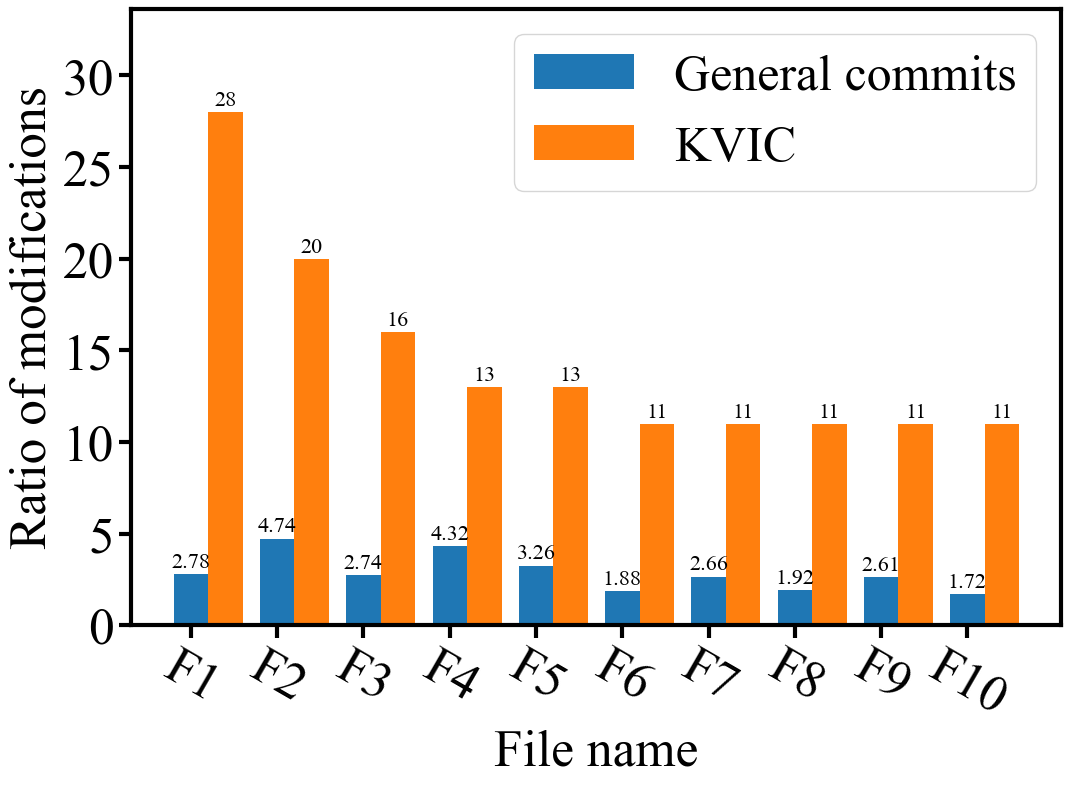

[('arch/x86/kvm', 0.2485025814722131, 1.1818181818181819), ('net/core', 0.20884228888931772, 0.9074074074074074), ('kernel/bpf', 0.12718811096315627, 0.85), ('fs/ext4', 0.14617197925048703, 0.7105263157894737), ('fs/f2fs', 0.21255940854414196, 0.6363636363636364), ('net/xfrm', 0.18756199629172732, 0.6), ('security/keys', 0.0739778127129325, 0.52), ('fs/proc', 0.12304881470364251, 0.5), ('fs/fuse', 0.22386209619835248, 0.5), ('net/sctp', 0.1422277692914052, 0.5)]
D1: "arch/x86/kvm"; D2: "net/core"; D3: "kernel/bpf"; D4: "fs/ext4"; D5: "fs/f2fs"; D6: "net/xfrm"; D7: "security/keys"; D8: "fs/proc"; D9: "fs/fuse"; D10: "net/sctp"; 

<Figure size 1200x800 with 0 Axes>

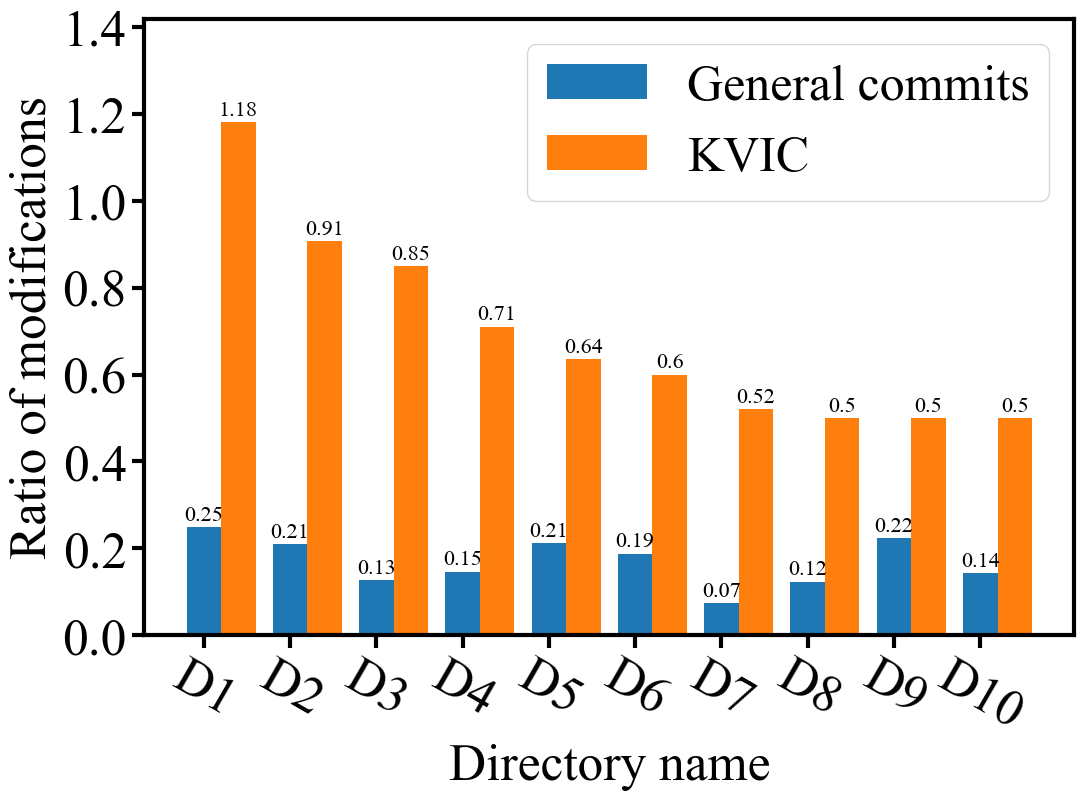

[('virt', 0.4651509955776844, 1.2), ('init', 0.28619907990897064, 0.6666666666666666), ('ipc', 0.2113383425648782, 0.5454545454545454), ('mm', 0.12890591496198658, 0.41007194244604317), ('kernel', 0.07878991004964407, 0.29207920792079206), ('security', 0.047653106213827325, 0.21428571428571427), ('net', 0.039699851741197945, 0.18775510204081633), ('fs', 0.04354492427642516, 0.14603409933283915), ('block', 0.11087028616642099, 0.13333333333333333), ('crypto', 0.029341804162348162, 0.11764705882352941)]
S1: "virt"; S2: "init"; S3: "ipc"; S4: "mm"; S5: "kernel"; S6: "security"; S7: "net"; S8: "fs"; S9: "block"; S10: "crypto"; 

<Figure size 1200x800 with 0 Axes>

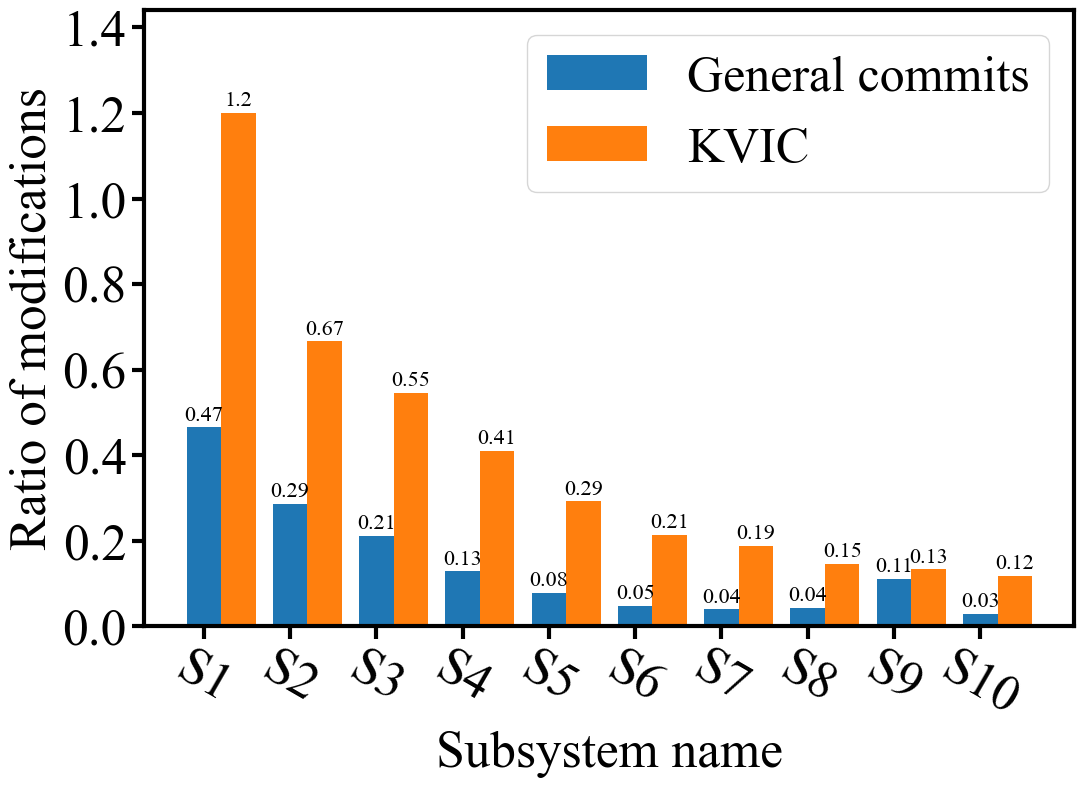

In [16]:
for prop in ['file', 'dir', 'sys']:
    
    t_d = pre_processing(prop)
    
    if prop == 'dir':
        count_of_dir = count_num_files_from({i[0]:1 for i in t_d})
        bad_dirs = []
        for k in count_of_dir:
            if count_of_dir[k] is None or count_of_dir[k] < 10:
                bad_dirs.append(k)
        t_d = [i for i in t_d if i[0] not in bad_dirs]
        t_d = [i for i in t_d if i[0] != 'ipc']
        
    if prop == 'sys':
        t_d = [i for i in t_d if i[0] not in ['Documentation']]
        
        
        
    how_many = 10
    x = [i[0] for i in t_d][:how_many]
    y1 = [i[1] for i in t_d][:how_many]
    y2 = [i[2] for i in t_d][:how_many]
    
    if prop == 'file':
        prop2 = 'File'
        vert_offset = 0.1
    elif prop == 'dir':
        prop2 = 'Directory'
        vert_offset = 0.005
    elif prop == 'sys':
        prop2 = 'Subsystem'
        vert_offset = 0.005
    print(t_d[:how_many])
    
    def print_str():
        count = 1
        for name in x:
            print(prop2[0] + str(count) + ": \"" + name + "\"; ", end = "")
            count += 1
    
    print_str()
        
    # y2 is kvic
    plot_column_double(x, y1, y2, title = prop + " comparison", x_label = prop2 + ' name', prefix = prop[0].upper(), vert_offset = vert_offset)
    
    
    

In [321]:
's'.upper()

'S'

In [129]:
print()

In [115]:
#TODO: take the largest difference between two files, print that in order

In [15]:
def plot_column_double(x, y1, y2, title, x_label, prefix, vert_offset):
    # y2 is used as KVIC
    f = plt.figure()
    fig, ax1 = plt.subplots()

    plt.rcParams['figure.figsize'] = (12.0, 8.0)
    plt.yticks(fontsize=37)
    plt.xticks(fontsize=37, rotation=330)

    max_y = max(max(y1), max(y2)) * 1.2
    plt.ylim(0,max_y)

    ax=plt.gca()  #获得坐标轴的句柄
    ax.spines['bottom'].set_linewidth(3)  #设置底部坐标轴的粗细
    ax.spines['left'].set_linewidth(3)  #设置左边坐标轴的粗细
    ax.spines['right'].set_linewidth(3)  #设置右边坐标轴的粗细
    ax.spines['top'].set_linewidth(3)  #设置上部坐标轴的粗细
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=9)
    ax.tick_params(which='minor', length=5)

    # 柱形的宽度
    width = 0.4

    # 绘制柱形图1
    
    x_t = list(range(len(x)))
    x_t1 = [prefix + str(i+1) for i in x_t]
    b1 = ax1.bar(x_t1, y1, width=width, color='#1f77b4', label='General commits')
    b2 = ax1.bar([i+width for i in x_t], y2, width, color='#ff7f0e', label='KVIC')

    # 坐标轴标签设置
    ax1.set_xlabel(x_label,fontsize=37)
    ax1.set_ylabel('Ratio of modifications',fontsize=37)


    # x轴标签旋转
    # ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 330)

    # 图例设置
    plt.legend(handles = [b1, b2], prop=font1)

    #plt.xticks(x, year)
    plt.yticks(fontsize=37)

    plt.ylim(min(min(y1), min(y2), 0))

    ax=plt.gca()  #获得坐标轴的句柄
    ax.spines['bottom'].set_linewidth(3)  #设置底部坐标轴的粗细
    ax.spines['left'].set_linewidth(3)  #设置左边坐标轴的粗细
    ax.spines['right'].set_linewidth(3)  #设置右边坐标轴的粗细
    ax.spines['top'].set_linewidth(3)  #设置上部坐标轴的粗细
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=9)
    ax.tick_params(which='minor', length=5)
    
    for a, b in zip(x_t, y1):
        ax.text(a, b+vert_offset, round(b, 2), ha='center', va='bottom', fontsize=16)
        
    for a, b in zip(x_t, y2):
        ax.text(a+width, b+vert_offset, round(b, 2), ha='center', va='bottom', fontsize=16)

    plt.show()
    fig.savefig(title, bbox_inches='tight')
    

In [362]:
1

1

In [345]:
# start to plot based on how many medians is each data point

[('kernel/bpf/verifier.c', 9.787914184880137, 18.79415016671085), ('security/keys/request_key.c', 1.238626463688135, 4.627869964343574), ('security/keys/keyring.c', 1.8395348658166464, 4.627869964343574), ('security/keys/process_keys.c', 1.7302787927023717, 3.9195559542252103), ('kernel/user_namespace.c', 2.0463410042115235, 3.9195559542252103), ('security/keys/key.c', 2.058047012045196, 3.9195559542252103), ('security/keys/request_key_auth.c', 0.7391701294514502, 2.5029279339884827), ('net/rds/tcp.c', 1.3439805341911857, 2.5029279339884827), ('fs/proc/base.c', 5.784459505764211, 6.752811994698665), ('kernel/fork.c', 9.643540088264848, 10.294382045290485)]
F1: "kernel/bpf/verifier.c"; F2: "security/keys/request_key.c"; F3: "security/keys/keyring.c"; F4: "security/keys/process_keys.c"; F5: "kernel/user_namespace.c"; F6: "security/keys/key.c"; F7: "security/keys/request_key_auth.c"; F8: "net/rds/tcp.c"; F9: "fs/proc/base.c"; F10: "kernel/fork.c"; 

<Figure size 1200x800 with 0 Axes>

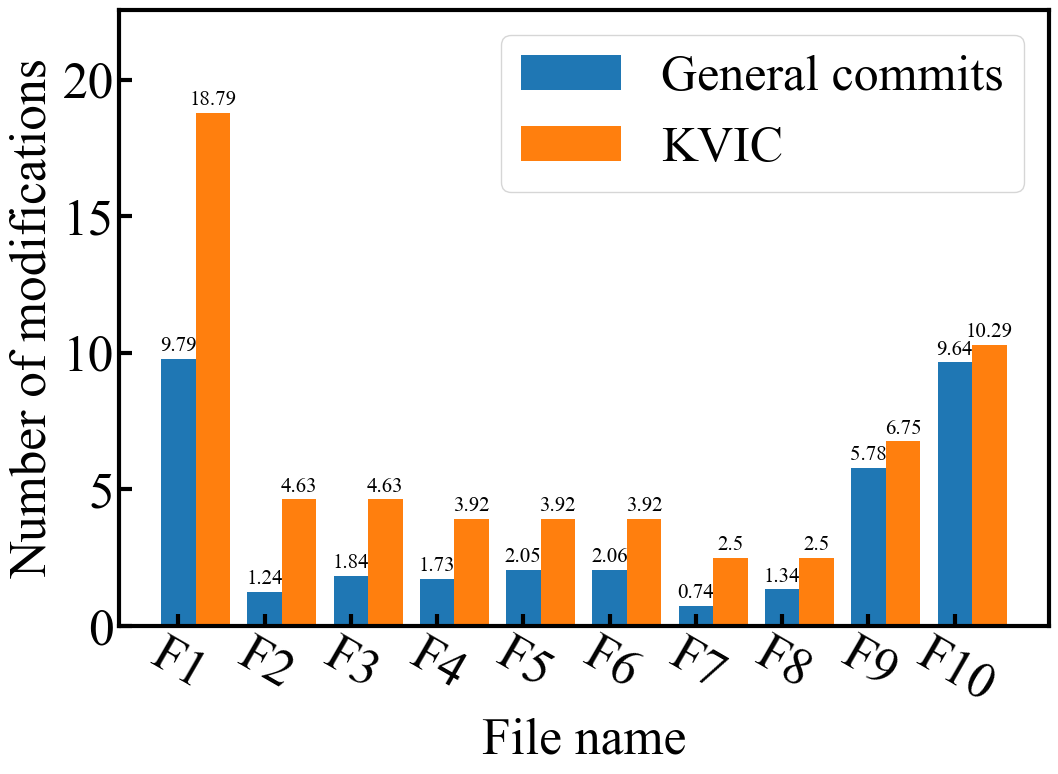

[('net/packet', 22.682002395743595, 31.711200338204037), ('fs/hugetlbfs', 25.40774737838363, 31.711200338204037), ('drivers/gpu/drm/amd/display/dc/bios/dce80', -0.5526936830430067, 5.709733519159842), ('drivers/gpu/drm/amd/acp', -0.4310991113267227, 5.709733519159842), ('drivers/gpu/drm/amd/display/dc/bios/dce110', -0.2892387776577247, 5.709733519159842), ('drivers/phy/mscc', -0.20817572984686855, 5.709733519159842), ('net/dns_resolver', 3.4193956596889383, 8.959916871540367), ('kernel/bpf/preload/iterators', 0.21740527116012529, 5.709733519159842), ('drivers/gpu/drm/amd/display/dc/irq/dce80', 0.5416574624035493, 5.709733519159842), ('drivers/gpu/drm/amd/display/dc/irq/dce110', 1.7170716556609618, 5.709733519159842)]
D1: "net/packet"; D2: "fs/hugetlbfs"; D3: "drivers/gpu/drm/amd/display/dc/bios/dce80"; D4: "drivers/gpu/drm/amd/acp"; D5: "drivers/gpu/drm/amd/display/dc/bios/dce110"; D6: "drivers/phy/mscc"; D7: "net/dns_resolver"; D8: "kernel/bpf/preload/iterators"; D9: "drivers/gpu/drm/

<Figure size 1200x800 with 0 Axes>

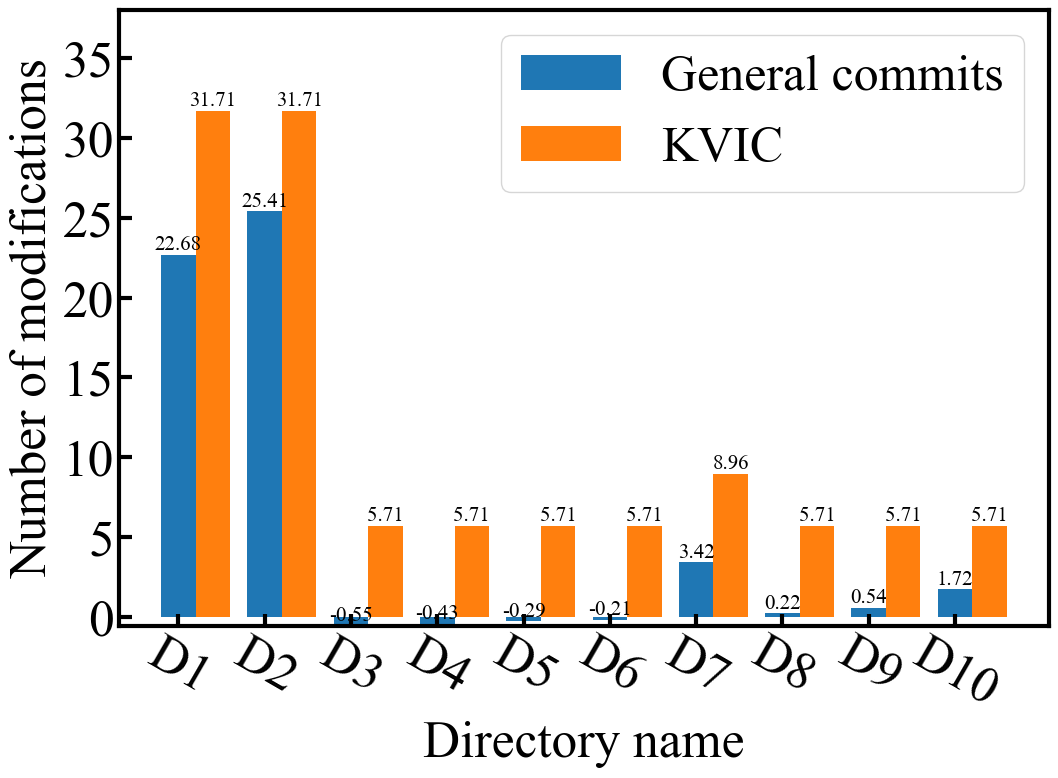

[('security', -0.45706216388146964, -0.22192644619867952), ('net', -0.5182432838765426, -0.29522775394380435), ('kernel', -0.21733522526408366, -0.0069911569231801), ('mm', 0.1682586322267814, 0.31901043193150325), ('crypto', -0.5979337886149961, -0.48892894726123837), ('fs', -0.4886551129352289, -0.41049852231895706), ('io_uring', -0.75651746259039, -0.8139754702939188), ('arch', -0.6802057318167648, -0.7477395750344292), ('tools', -0.7397343033249177, -0.8093221727010299), ('lib', -0.6598397448165131, -0.7403874559995953)]
S1: "security"; S2: "net"; S3: "kernel"; S4: "mm"; S5: "crypto"; S6: "fs"; S7: "io_uring"; S8: "arch"; S9: "tools"; S10: "lib"; 

<Figure size 1200x800 with 0 Axes>

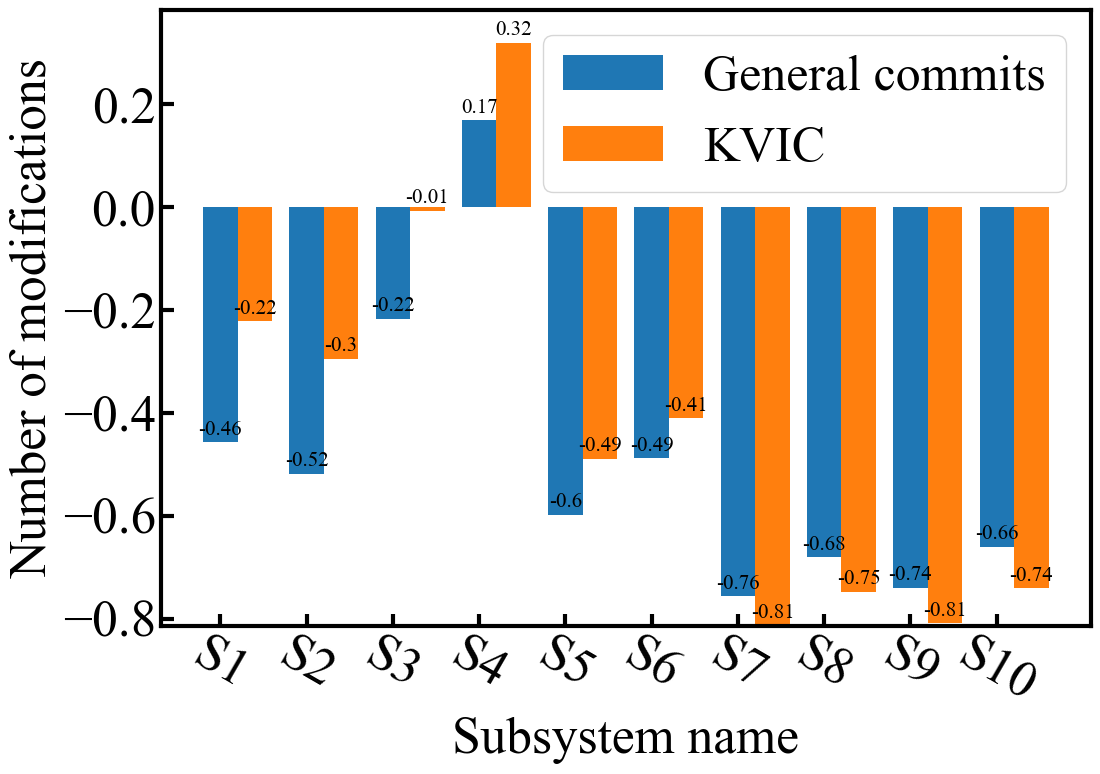

In [372]:
for which_to_plot in ['file', 'dir', 'sys']:
    x, y1, y2 = get_counts(non_kvic_sys_dir[which_to_plot], kvic_sys_dir[which_to_plot])
    
    t_d = []
    for i in range(len(x)):
        t_d.append((x[i], y1[i], y2[i]))

    # sorted on KVICs
    t_d = sorted(t_d, key = lambda x:-x[2])
    # y2 is kvic
    
    if which_to_plot == 'dir':
        count_of_dir = count_num_files_from({i[0]:1 for i in t_d})
        bad_dirs = []
        for k in count_of_dir:
            if count_of_dir[k] is None or count_of_dir[k] < 10:
                bad_dirs.append(k)
        t_d = [i for i in t_d if i[0] not in bad_dirs]
        
    x = [i[0] for i in t_d]
    y1 = [i[1] for i in t_d]
    y2 = [i[2] for i in t_d]

    import statistics
    while 0 in y1:
        y1.remove(0)
    y1_mean = statistics.mean(y1)
    y1_std = statistics.stdev(y1)

    while 0 in y2:
        y2.remove(0)
    y2_mean = statistics.mean(y2)
    y2_std = statistics.stdev(y2)

    x, y1, y2 = get_counts(non_kvic_sys_dir[which_to_plot], kvic_sys_dir[which_to_plot])

    y1 = [(i - y1_mean) / y1_std for i in y1]
    y2 = [(i - y2_mean) / y2_std for i in y2]

    t_d = []
    for i in range(len(x)):
        t_d.append((x[i], y1[i], y2[i]))

    t_d = [i for i in t_d if i[2] != 0 and i[1] != 0]
    t_d.sort(key = lambda x:(x[1]-x[2]))
    # y2 is kvic
    
    if which_to_plot == 'file':
        cd = kvic_sys_dir[which_to_plot]
        new_d = {k:cd[k] for k in cd if cd[k] >= 5}
        good_files = list(new_d.keys())

        t_d = [i for i in t_d if i[0] in good_files]

    #t_d = [i for i in t_d if i[2] > 0]
    how_many = 10
    x = [i[0] for i in t_d][:how_many]
    y1 = [i[1] for i in t_d][:how_many]
    y2 = [i[2] for i in t_d][:how_many]
    
    
    if which_to_plot == 'file':
        prop2 = 'File'
        vert_offset = 0.1
    elif which_to_plot == 'dir':
        prop2 = 'Directory'
        vert_offset = 0.005
    elif which_to_plot == 'sys':
        prop2 = 'Subsystem'
        vert_offset = 0.005
    print(t_d[:how_many])
    
    def print_str():
        count = 1
        for name in x:
            print(prop2[0] + str(count) + ": \"" + name + "\"; ", end = "")
            count += 1
    
    print_str()
        
    # y2 is kvic
    plot_column_double(x, y1, y2, title = which_to_plot + " comparison of num of std", x_label = prop2 + ' name', prefix = which_to_plot[0].upper(), vert_offset = vert_offset)
    
    
    


In [351]:
min(1,2,3)

1

<Figure size 1200x800 with 0 Axes>

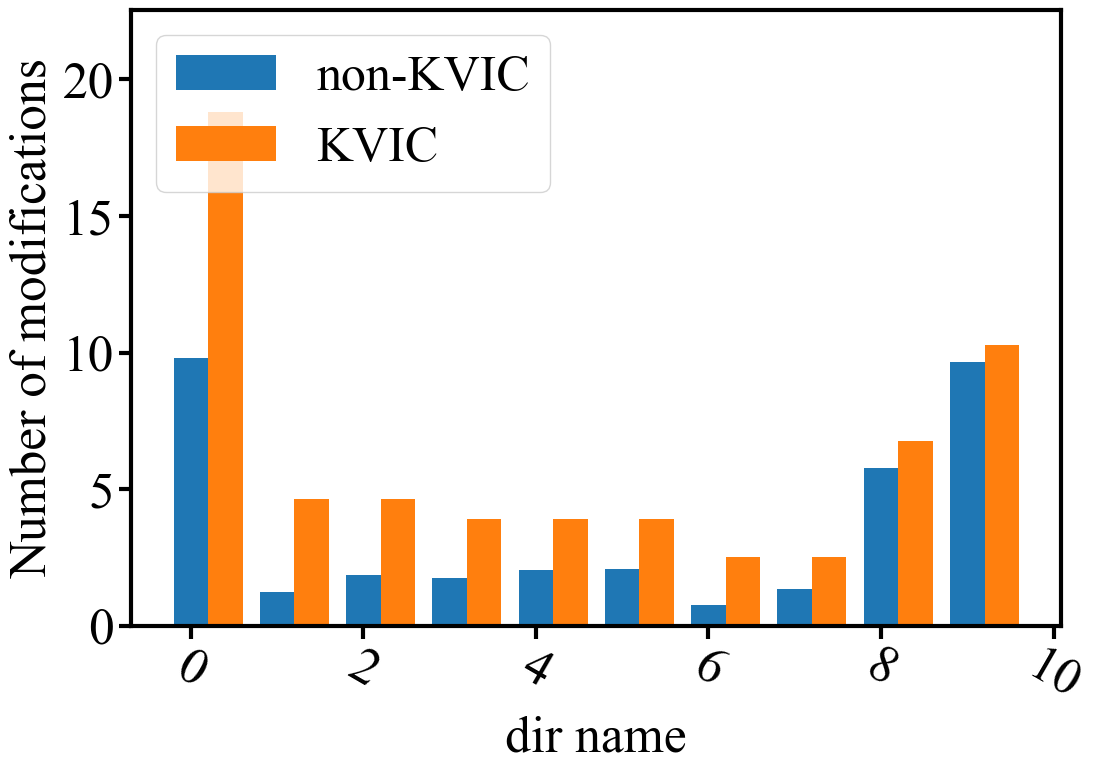

 This figure is the number of std that a data point lies from the mean, ranked by the difference between the KVICs from the general commit population. It can be observed that ... are more likely to cause



In [ ]:
kvic_sys_dir = get_dir_sys_from_dates(['complete_kvic'], sub_folder = "complete_kvic_cache")
non_kvic_sys_dir 

buffer

TESTING

TESTING END

In [50]:
cur_path = "/Users/jinanjiang/Documents/LinuxCommits/linux/" + k
os.listdir(cur_path)

['tsacct.c',
 'latencytop.c',
 'gcov',
 'power',
 'static_call_inline.c',
 'Kconfig.hz',
 'audit.h',
 'iomem.c',
 'kexec_core.c',
 'kcsan',
 'futex',
 'kallsyms_internal.h',
 'async.c',
 'utsname.c',
 'rseq.c',
 'exec_domain.c',
 'smpboot.c',
 'bounds.c',
 'trace',
 'sys.c',
 'compat.c',
 'audit_watch.c',
 'Kconfig.freezer',
 'usermode_driver.c',
 'resource.c',
 'stop_machine.c',
 'livepatch',
 'audit_tree.c',
 'cpu.c',
 'delayacct.c',
 'Kconfig.preempt',
 'kcov.c',
 'static_call.c',
 'sysctl.c',
 'ptrace.c',
 'user.c',
 'fork.c',
 'backtracetest.c',
 'entry',
 'user_namespace.c',
 'Makefile',
 'kexec.c',
 'regset.c',
 'module',
 'extable.c',
 'irq',
 'kexec_internal.h',
 'locking',
 'pid.c',
 'padata.c',
 'kexec_elf.c',
 'fail_function.c',
 'cfi.c',
 'exit.c',
 'panic.c',
 'module_signature.c',
 'kexec_file.c',
 'up.c',
 'resource_kunit.c',
 'groups.c',
 'watchdog_hld.c',
 'auditsc.c',
 'workqueue_internal.h',
 'hung_task.c',
 'crash_dump.c',
 'sched',
 'ucount.c',
 'cgroup',
 'acct.c

In [49]:
k = "kernel"

In [57]:
def find_size(k):
    try:
        cur_path = "/Users/jinanjiang/Documents/LinuxCommits/linux/" + k
        cur_all_files = os.listdir(cur_path)
    except:
        return 1
    files = [i for i in cur_all_files if '.' in i]
    folders = [i for i in cur_all_files if '.' not in i]
    c = 0
    for f in folders:
        c += find_size(k + '/' + f)
    return len(files) + c

In [58]:
find_size('kernel')

553

In [ ]:
size_dict = {}
for k in count_dict.keys():
    cur_path = "/Users/jinanjiang/Documents/LinuxCommits/linux/" + k

    if not os.path.exists(cur_path):
        size_dict[k] = None
    else:
        size_dict[k] = len(os.listdir(cur_path))

In [5]:
['num_adds_if', 'num_dels_if', 'num_mod_total_if', 'num_adds_loop', 'num_dels_loop', 'num_mod_total_loop', 'file_hash', 'num_adds', 'num_dels', 'num_mod_lns_total', 'num_mod_files', 'is_merge', 'parents', 'mod_files_lst', 'entropy', 'ppl_signed_off', 'ppl_acked', 'ppl_cc', 'ppl_reviewed', 'ppl_tested', 'ppl_reported', 'ppl_suggested', 'ppl_co_developed', 'fixes_lst', 'is_fix', 'mod_dirs', 'mod_sys', 'num_mod_dirs', 'num_mod_sys', 'author', 'author_email', 'committer', 'committer_email', 'author_date', 'committer_date']

['num_adds_if',
 'num_dels_if',
 'num_mod_total_if',
 'num_adds_loop',
 'num_dels_loop',
 'num_mod_total_loop',
 'file_hash',
 'num_adds',
 'num_dels',
 'num_mod_lns_total',
 'num_mod_files',
 'is_merge',
 'parents',
 'mod_files_lst',
 'entropy',
 'ppl_signed_off',
 'ppl_acked',
 'ppl_cc',
 'ppl_reviewed',
 'ppl_tested',
 'ppl_reported',
 'ppl_suggested',
 'ppl_co_developed',
 'fixes_lst',
 'is_fix',
 'mod_dirs',
 'mod_sys',
 'num_mod_dirs',
 'num_mod_sys',
 'author',
 'author_email',
 'committer',
 'committer_email',
 'author_date',
 'committer_date']

In [8]:
import re

In [6]:
st = "Signed-off-by: Catherine Sullivan <catherine.sullivan@intel.com>"

In [15]:
fst_c = st.find(':')
snd_c = st.find('<')
thd_c = st.find('>')
name = st[f + 2:s - 1]
email = st[snd_c+1 : thd_c]

In [14]:
name

'Catherine Sullivan'

In [16]:
email

'catherine.sullivan@intel.com'

# first page figure

In [2]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.pyplot import MultipleLocator
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter

In [4]:
font1 = {
    'family' : 'Times New Roman',
#     'family' : 'Arial',
#     'family' : 'SimHei',
    'weight' : 'normal',
    'size'   : 36,
}

<Figure size 1200x800 with 0 Axes>

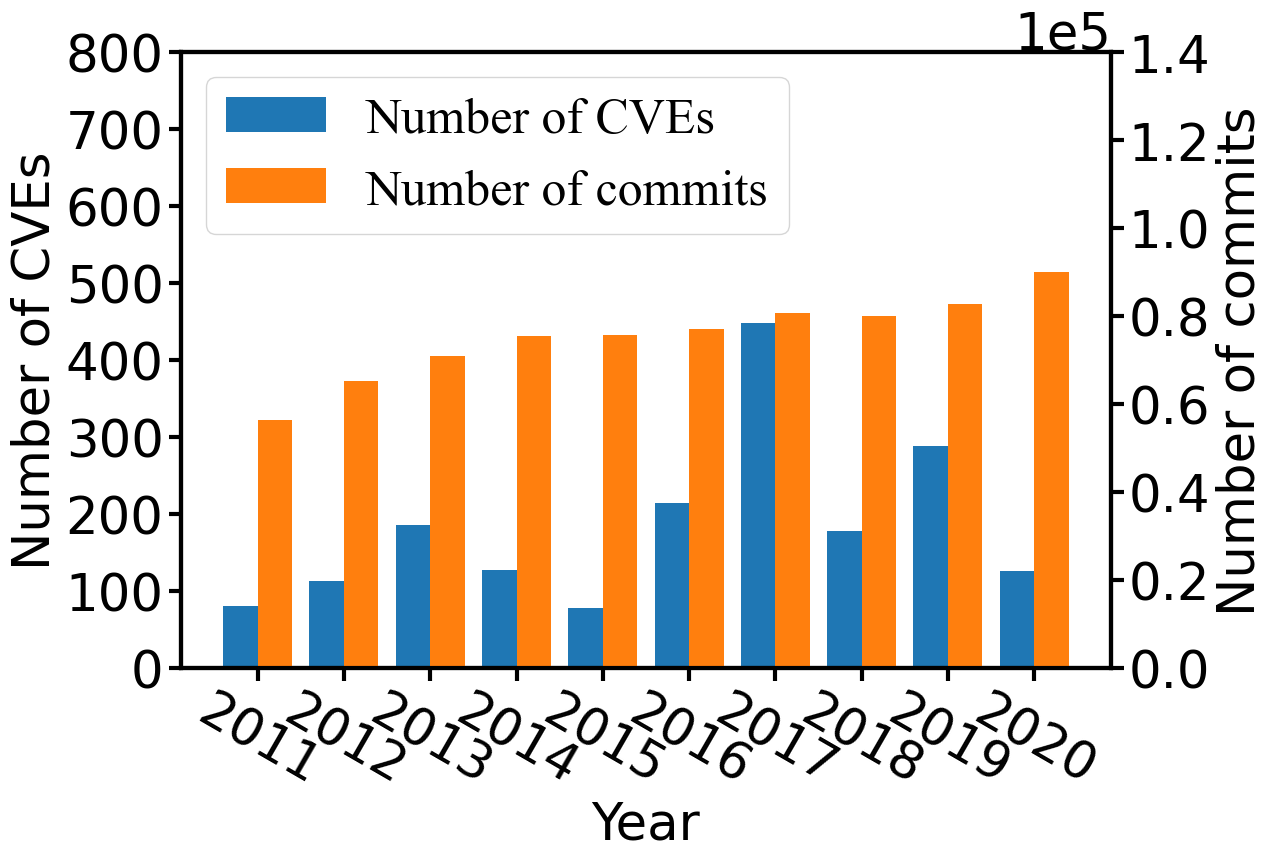

In [5]:
year = [str(i) for i in range(1999, 2022)]
y1 = [19,5,23,15,19,50,133,89,59,67,104,118,81,114,186,128,79,215,449,178,289,126,133]
y2 = [56426, 65386, 70970, 75655, 75827, 77080, 80827, 80158, 82868, 90158]
y2_sci = []
for i in range(len(y2)):
    y2_sci.append('$%.1f$x$10^{4}$' % (y2[i]/10000))
year = year[-11:-1]
y1 = y1[-11:-1]
x=range(len(year))

f = plt.figure()
fig, ax1 = plt.subplots()

plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.yticks(fontsize=37)
plt.xticks(fontsize=37, rotation=330)

plt.ylim(0,800)

ax=plt.gca()  #获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(3)  #设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(3)  #设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(3)  #设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(3)  #设置上部坐标轴的粗细
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=9)
ax.tick_params(which='minor', length=5)

# 柱形的宽度
width = 0.4

# 绘制柱形图1
b1 = ax1.bar([i - width/2 for i in x], y1, width=width, color='#1f77b4', label='Number of CVEs')

# 绘制柱形图2---双Y轴
ax2 = ax1.twinx()
b2 = ax2.bar([i + width/2 for i in x], y2, width=width, color='#ff7f0e', label='Number of commits')
ax2.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
ax2.yaxis.get_offset_text().set_fontsize(37)

# 坐标轴标签设置
ax1.set_xlabel('Year',fontsize=37)
ax1.set_ylabel('Number of CVEs',fontsize=37)
ax2.set_ylabel('Number of commits',fontsize=37)

# x轴标签旋转
# ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 330)

# # 双Y轴标签颜色设置
# ax1.yaxis.label.set_color(b1[0].get_facecolor())
# ax2.yaxis.label.set_color(b2[0].get_facecolor())

# # 双Y轴刻度颜色设置
# ax1.tick_params(axis = 'y', colors = b1[0].get_facecolor())
# ax2.tick_params(axis = 'y', colors = b2[0].get_facecolor())

# 图例设置
plt.legend(handles = [b1, b2], prop=font1, loc = 2)

plt.xticks(x, year)
plt.yticks(fontsize=37)

plt.ylim(0,140000)

ax=plt.gca()  #获得坐标轴的句柄
ax.spines['bottom'].set_linewidth(3)  #设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(3)  #设置左边坐标轴的粗细
ax.spines['right'].set_linewidth(3)  #设置右边坐标轴的粗细
ax.spines['top'].set_linewidth(3)  #设置上部坐标轴的粗细
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=9)
ax.tick_params(which='minor', length=5)

plt.show()
fig.savefig("12_Number_of_linux_kernel_cves_and_commits.pdf", bbox_inches='tight')


